# Demographic Health Exploration

In [41]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

In [42]:
df_raw = pd.read_csv('../data/raw/demographic_health_raw.csv')
df_raw.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


# Data Dictionary

| Feature | Description |
|---------|-------------|
| fips | FIPS Code for the County |
| TOT_POP | Total Population (2019 Population Estimates, US Census) |
| 0-9 | Population aged 0-9 |
| 0-9 y/o % of total pop | % of the population aged 0-9 |
| 10-19 | Population aged 10-19 |
| 10-19 y/o % of total pop | % of the population aged 10-19 |
| 20-29 | Population aged 20-29 |
| 20-29 y/o % of total pop | % of the population aged 20-29 |
| 30-39 | Population aged 30-39 |
| 30-39 y/o % of total pop | % of the population aged 30-39 |
| 40-49 | Population aged 40-49 |
| 40-49 y/o % of total pop | % of the population aged 40-49 |
| 50-59 | Population aged 50-59 |
| 50-59 y/o % of total pop | % of the population aged 50-59 |
| 60-69 | Population aged 60-69 |
| 60-69 y/o % of total pop | % of the population aged 60-69 |
| 70-79 | Population aged 70-79 |
| 70-79 y/o % of total pop | % of the population aged 70-79 |
| 80+ | Population aged 80+ |
| 80+ y/o % of total pop | % of the population aged 80+ |
| White-alone pop | Population that is White only |
| % White-alone | % of population that is White only |
| Black-alone pop | Population that is Black only |
| % Black-alone | % of population that is Black only |
| Native American/American Indian-alone pop | Population that is Native American/AI only |
| % NA/AI-alone | % of population that is Native American/AI only |
| Asian-alone pop | Population that is Asian only |
| % Asian-alone | % of population that is Asian only |
| Hawaiian/Pacific Islander-alone pop | Population that is Hawaiian/PI only |
| % Hawaiian/PI-alone | % of population that is Hawaiian/PI only |
| Two or more races pop | Population of two or more races |
| % Two or more races | % of population of two or more races |
| N_POP_CHG_2018 | Numeric change in resident total population (7/1/2017–7/1/2018) |
| GQ_ESTIMATES_2018 | Group Quarters total population estimate (7/1/2018) |
| R_birth_2018 | Birth rate (7/1/2017–6/30/2018) |
| R_death_2018 | Death rate (7/1/2017–6/30/2018) |
| R_NATURAL_INC_2018 | Natural increase rate (7/1/2016–6/30/2017) |
| R_INTERNATIONAL_MIG_2018 | Net international migration rate (7/1/2017–6/30/2018) |
| R_DOMESTIC_MIG_2018 | Net domestic migration rate (7/1/2017–6/30/2018) |
| R_NET_MIG_2018 | Net migration rate (7/1/2017–6/30/2018) |
| Less than a high school diploma 2014-18 | Population with less than a high school diploma |
| High school diploma only 2014-18 | Population with high school diploma only |
| Some college or associate's degree 2014-18 | Population with some college/associate's degree |
| Bachelor's degree or higher 2014-18 | Population with a bachelor's degree or higher |
| Percent of adults with less than a high school diploma 2014-18 | % of adults with less than a high school diploma |
| Percent of adults with a high school diploma only 2014-18 | % of adults with a high school diploma only |
| Percent of adults completing some college or associate's degree 2014-18 | % of adults with some college/associate's degree |
| Percent of adults with a bachelor's degree or higher 2014-18 | % of adults with a bachelor's degree or higher |
| POVALL_2018 | Estimate of people of all ages in poverty (2018) |
| PCTPOVALL_2018 | Estimated % of people of all ages in poverty (2018) |
| PCTPOV017_2018 | Estimated % of people age 0-17 in poverty (2018) |
| PCTPOV517_2018 | Estimated % of children age 5-17 in families in poverty (2018) |
| MEDHHINC_2018 | Median household income (2018) |
| CI90LBINC_2018 | 90% CI lower bound for median household income (2018) |
| CI90UBINC_2018 | 90% CI upper bound for median household income (2018) |
| Civilian_labor_force_2018 | Civilian labor force annual average |
| Employed_2018 | Number employed (annual average) |
| Unemployed_2018 | Number unemployed (annual average) |
| Unemployment_rate_2018 | Unemployment rate |
| Med_HH_Income_Percent_of_State_Total_2018 | County median HH income as % of state total |
| Active Physicians per 100000 Population 2018 (AAMC) | Total active patient care physicians per 100k (2018) |
| Total Active Patient Care Physicians per 100000 Population 2018 (AAMC) | Active primary care physicians per 100k (2018) |
| Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC) | Active patient care primary care physicians per 100k (2018) |
| Active General Surgeons per 100000 Population 2018 (AAMC) | Active general surgeons per 100k (2018) |
| Active Patient Care General Surgeons per 100000 Population 2018 (AAMC) | Active patient care general surgeons per 100k (2018) |
| Total nurse practitioners (2019) | Total nurse practitioners (2019) |
| Total physician assistants (2019) | Total physician assistants (2019) |
| Total Hospitals (2019) | Total hospitals (2019) |
| Internal Medicine Primary Care (2019) | Active internal medicine primary care physicians (2019) |
| Family Medicine/General Practice Primary Care (2019) | Active family medicine/general practice primary care physicians (2019) |
| Total Specialist Physicians (2019) | Sum of specialist physicians (Psychiatry, Surgery, Anesthesiology, Emergency Med, Radiology, Cardiology, Oncology, Endocrinology, etc.) |
| ICU Beds_x | Number of ICU beds per county |
| Population Aged 60+ | Population aged 60+ |
| Percent of Population Aged 60+ | % of the population aged 60+ |
| STATE_FIPS | FIPS Code for the State |
| county_pop2018_18 and older | Population aged 18+ per county (2018) |
| anycondition_prevalence | Prevalence rate of any condition |
| anycondition_Lower 95% CI | Lower 95% CI for prevalence of any condition |
| anycondition_Upper 95% CI | Upper 95% CI for prevalence of any condition |
| anycondition_number | Population with any condition |
| Obesity_prevalence | Obesity prevalence |
| Obesity_Lower 95% CI | Lower 95% CI for obesity prevalence |
| Obesity_Upper 95% CI | Upper 95% CI for obesity prevalence |
| Obesity_number | Population with obesity |
| Heart disease_prevalence | Heart disease prevalence |
| Heart disease_Lower 95% CI | Lower 95% CI for heart disease prevalence |
| Heart disease_Upper 95% CI | Upper 95% CI for heart disease prevalence |
| Heart disease_number | Population with heart disease |
| COPD_prevalence | COPD prevalence |
| COPD_Lower 95% CI | Lower 95% CI for COPD prevalence |
| COPD_Upper 95% CI | Upper 95% CI for COPD prevalence |
| COPD_number | Population with COPD |
| diabetes_prevalence | Diabetes prevalence |
| diabetes_Lower 95% CI | Lower 95% CI for diabetes prevalence |
| diabetes_Upper 95% CI | Upper 95% CI for diabetes prevalence |
| diabetes_number | Population with diabetes |
| CKD_prevalence | Chronic kidney disease (CKD) prevalence |
| CKD_Lower 95% CI | Lower 95% CI for CKD prevalence |
| CKD_Upper 95% CI | Upper 95% CI for CKD prevalence |
| CKD_number | Population with CKD |
| Urban_rural_code | Rural-Urban Continuum Code (1–9, 88, 99) |

### Cleaning the dataset

This dataset contains information about different diseases. This work will focus on predicting **obesity** prevalence. To do this (and at first sight), identifiers and raw number columns (percentages will be kept to avoid scaling later) will be used, thus any other disease related variable such as heart disease or diabetes will be dropped.

In [43]:
# Preprocessing
df_baking = df_raw.copy()

df_baking.columns = df_baking.columns.str.lower()
df_baking.columns = df_baking.columns.str.replace(' ', '_')

In [44]:
# Keep desired columns
key_words = ['%', 'percent', 'pct', 'med', 'active', 'total', 'prevalence', 'r_', 'active']

tmp_cols = ['n_pop_chg_2018', 'gq_estimates_2018', 'civilian_labor_force_2018',
             'unemployment_rate_2018', 'icu_beds_x']

for col in df_baking.columns:
    for word in key_words:
        if word in col:
            tmp_cols.append(col)

keep_cols = [item for item in tmp_cols if '95%' not in item]

drop_cols = ['anycondition_prevalence', 'obesity_prevalence', 'heart_disease_prevalence',
             'copd_prevalence', 'ckd_prevalence']

df_baking = df_baking[keep_cols].drop(columns=drop_cols)

df_baking

,n_pop_chg_2018,gq_estimates_2018,civilian_labor_force_2018,unemployment_rate_2018,icu_beds_x,0-9_y/o_%_of_total_pop,0-9_y/o_%_of_total_pop,10-19_y/o_%_of_total_pop,10-19_y/o_%_of_total_pop,20-29_y/o_%_of_total_pop,...,active_patient_care_general_surgeons_per_100000_population_2018_(aamc),total_nurse_practitioners_(2019),total_physician_assistants_(2019),total_hospitals_(2019),internal_medicine_primary_care_(2019),family_medicine/general_practice_primary_care_(2019),total_specialist_physicians_(2019),total_population,percent_of_population_aged_60+,diabetes_prevalence
0,158,455,25957,3.6,6,12.206615,12.206615,13.735364,13.735364,12.370281,...,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,55036,19.1,12.9
1,5403,2190,93849,3.6,51,11.355276,11.355276,12.344167,12.344167,10.814964,...,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,203360,26.3,12.0
2,-277,2820,8373,5.2,5,10.980266,10.980266,11.896628,11.896628,13.134520,...,6.9,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,26201,23.5,19.7
3,-155,2151,8661,4.0,0,10.964286,10.964286,11.589286,11.589286,13.522321,...,6.9,11.626493,2.451783,0.462860,10.471635,8.560619,29.063942,22580,21.1,14.1
4,13,489,25006,3.5,6,12.266598,12.266598,13.087828,13.087828,11.656293,...,6.9,30.021267,6.330854,1.195171,27.039257,22.104740,75.047251,57667,23.6,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,-496,660,21150,4.2,10,14.178532,14.178532,14.694200,14.694200,12.448027,...,10.4,21.311749,11.997173,2.160982,9.836192,28.018244,40.537033,44527,15.8,8.9
3136,-180,270,15340,3.0,6,10.328842,10.328842,9.466661,9.466661,12.854729,...,10.4,11.425901,6.432063,1.158570,5.273493,15.021465,21.733183,22923,18.7,7.2
3137,-157,220,8931,4.4,6,15.375142,15.375142,15.788955,15.788955,10.606434,...,10.4,10.048714,5.656794,1.018926,4.637868,13.210897,19.113638,20758,17.1,10.4
3138,-150,140,4058,4.2,0,10.881420,10.881420,14.115409,14.115409,9.067850,...,10.4,3.903350,2.197341,0.395794,1.801546,5.131678,7.424555,8253,26.7,11.3


In [47]:
# Scaling the data set
scaler = StandardScaler()
features = scaler.fit_transform(df_baking)

# Create dataset
df_baking_sel = pd.DataFrame(features, index=df_baking.index, columns=df_baking.columns)
df_baking_sel['diabetes_prevalence'] = df_baking['diabetes_prevalence']

df_baking_sel

,n_pop_chg_2018,gq_estimates_2018,civilian_labor_force_2018,unemployment_rate_2018,icu_beds_x,0-9_y/o_%_of_total_pop,0-9_y/o_%_of_total_pop,10-19_y/o_%_of_total_pop,10-19_y/o_%_of_total_pop,20-29_y/o_%_of_total_pop,...,active_patient_care_general_surgeons_per_100000_population_2018_(aamc),total_nurse_practitioners_(2019),total_physician_assistants_(2019),total_hospitals_(2019),internal_medicine_primary_care_(2019),family_medicine/general_practice_primary_care_(2019),total_specialist_physicians_(2019),total_population,percent_of_population_aged_60+,diabetes_prevalence
0,-0.154872,-0.316235,-0.151210,-0.353571,-0.210637,0.158006,0.158006,0.573496,0.573496,0.027610,...,0.110809,-0.154944,-0.256149,-0.117965,-0.171894,-0.173594,-0.175321,-0.143727,-1.013112,12.9
1,1.518514,-0.057592,0.251083,-0.353571,0.321349,-0.242861,-0.242861,-0.193107,-0.193107,-0.469965,...,0.110809,0.392996,-0.050378,0.663857,0.181753,0.291971,0.212820,0.308018,0.280924,12.0
2,-0.293656,0.036324,-0.255403,0.711126,-0.222459,-0.419441,-0.419441,-0.439718,-0.439718,0.272104,...,0.110809,-0.258581,-0.295069,-0.265837,-0.238782,-0.261650,-0.248733,-0.231549,-0.222312,19.7
3,-0.254733,-0.063406,-0.253697,-0.087397,-0.281569,-0.426966,-0.426966,-0.609076,-0.609076,0.396168,...,0.110809,-0.266951,-0.298212,-0.277780,-0.244184,-0.268761,-0.254662,-0.242577,-0.653658,14.1
4,-0.201133,-0.311166,-0.156845,-0.420115,-0.210637,0.186249,0.186249,0.216679,0.216679,-0.200808,...,0.110809,-0.147391,-0.253313,-0.107187,-0.167019,-0.167176,-0.169970,-0.135714,-0.204340,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,-0.363526,-0.285675,-0.179694,0.045690,-0.163350,1.086516,1.086516,1.101851,1.101851,0.052482,...,3.217413,-0.204000,-0.187727,0.117799,-0.247144,-0.122823,-0.233531,-0.175734,-1.606213,8.9
3136,-0.262709,-0.343813,-0.214121,-0.752833,-0.210637,-0.726175,-0.726175,-1.778724,-1.778724,0.182593,...,3.217413,-0.268254,-0.252141,-0.115713,-0.268395,-0.220303,-0.268164,-0.241532,-1.085003,7.2
3137,-0.255371,-0.351267,-0.252097,0.178778,-0.210637,1.649960,1.649960,1.705104,1.705104,-0.536677,...,3.217413,-0.277206,-0.261115,-0.148244,-0.271355,-0.233883,-0.272989,-0.248126,-1.372567,10.4
3138,-0.253137,-0.363193,-0.280972,0.045690,-0.281569,-0.465984,-0.465984,0.782915,0.782915,-1.028898,...,3.217413,-0.317148,-0.301157,-0.293403,-0.284566,-0.294480,-0.294517,-0.286212,0.352815,11.3


In [48]:
df = df_baking_sel.copy()

In [54]:
X = df.drop(columns='diabetes_prevalence').T.drop_duplicates().T
y = df['diabetes_prevalence']

selector = SelectKBest(score_func=f_regression, k=15)

X_sel = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]

X_selected = pd.DataFrame(X_sel, columns=selected_features, index=X.index)

df_processed = X[X_selected.columns]
df_processed['diabetes_prevalence'] = list(y)

df_processed.sample(10)

/tmp/ipykernel_1832/2484848874.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed['diabetes_prevalence'] = list(y)


,unemployment_rate_2018,%_white-alone,%_black-alone,r_death_2018,r_natural_inc_2018,percent_of_adults_with_less_than_a_high_school_diploma_2014-18,percent_of_adults_with_a_high_school_diploma_only_2014-18,percent_of_adults_with_a_bachelor's_degree_or_higher_2014-18,pctpovall_2018,pctpov017_2018,pctpov517_2018,medhhinc_2018,med_hh_income_percent_of_state_total_2018,active_primary_care_physicians_per_100000_population_2018_(aamc),active_patient_care_primary_care_physicians_per_100000_population_2018_(aamc),diabetes_prevalence
947,-1.218638,0.749637,-0.627401,1.985294,-0.666220,-1.437671,-0.220477,0.395097,-0.613199,-0.404911,-0.225923,-0.090112,-0.040391,0.003282,0.040621,12.9
1655,-0.486658,0.780978,-0.512891,-2.331604,1.158209,-1.658601,-0.707131,-0.092562,-0.433780,0.437037,0.514636,0.078954,0.039047,0.019198,0.021548,11.9
209,-0.220484,0.360009,-0.589624,-2.666536,1.232172,-0.333019,-1.597011,0.956965,-0.955726,-1.067244,-0.989269,0.987497,-0.050321,0.655835,0.670030,9.6
270,1.576193,0.273688,-0.554122,1.464289,-2.046868,-0.774880,-0.776652,-0.018353,1.066816,1.829059,1.414701,-1.044536,-1.797972,0.592172,0.841687,13.5
1120,-0.220484,-0.869560,1.128662,-0.135940,0.936319,0.014157,-0.067529,0.034653,-0.042320,-0.000776,0.058907,-0.160802,0.783785,-0.307079,-0.407594,12.9
946,-0.353571,0.661595,-0.547947,-0.545301,0.147377,-1.437671,-0.289999,0.649528,-1.184078,-1.280537,-1.239920,1.366548,1.687400,0.003282,0.040621,10.2
676,0.112234,-0.143414,0.249157,0.198992,-0.197785,-0.916906,-0.887887,1.338612,-0.335915,-0.124262,-0.248710,0.681365,0.312118,0.926406,0.679567,10.5
2653,-0.619746,0.577244,-0.511576,1.389860,-1.085345,-0.301457,-0.943505,0.426901,-0.205428,0.246196,0.252592,0.067376,-0.040391,-1.198371,-1.294489,14.6
2353,-0.486658,-2.361481,2.687718,-0.991877,0.689775,-0.711757,-1.652628,1.709657,0.251275,-0.101810,-0.100598,-0.011224,0.540504,-0.625397,-0.741372,11.0
911,-1.152094,0.618307,-0.555865,-0.694160,0.615811,-0.964249,-1.082549,1.402219,-0.515334,-0.999888,-0.989269,0.077156,0.158205,0.003282,0.040621,9.9


In [55]:
# Save processed dataframe
df_processed.to_csv('../data/processed/demographic_health_processed.csv', index=False)

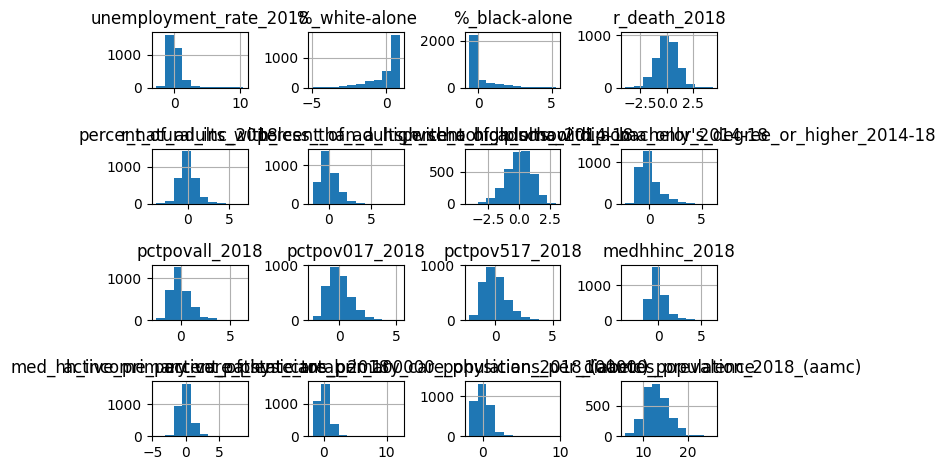

In [57]:
df_processed.hist()
plt.tight_layout()
plt.show()

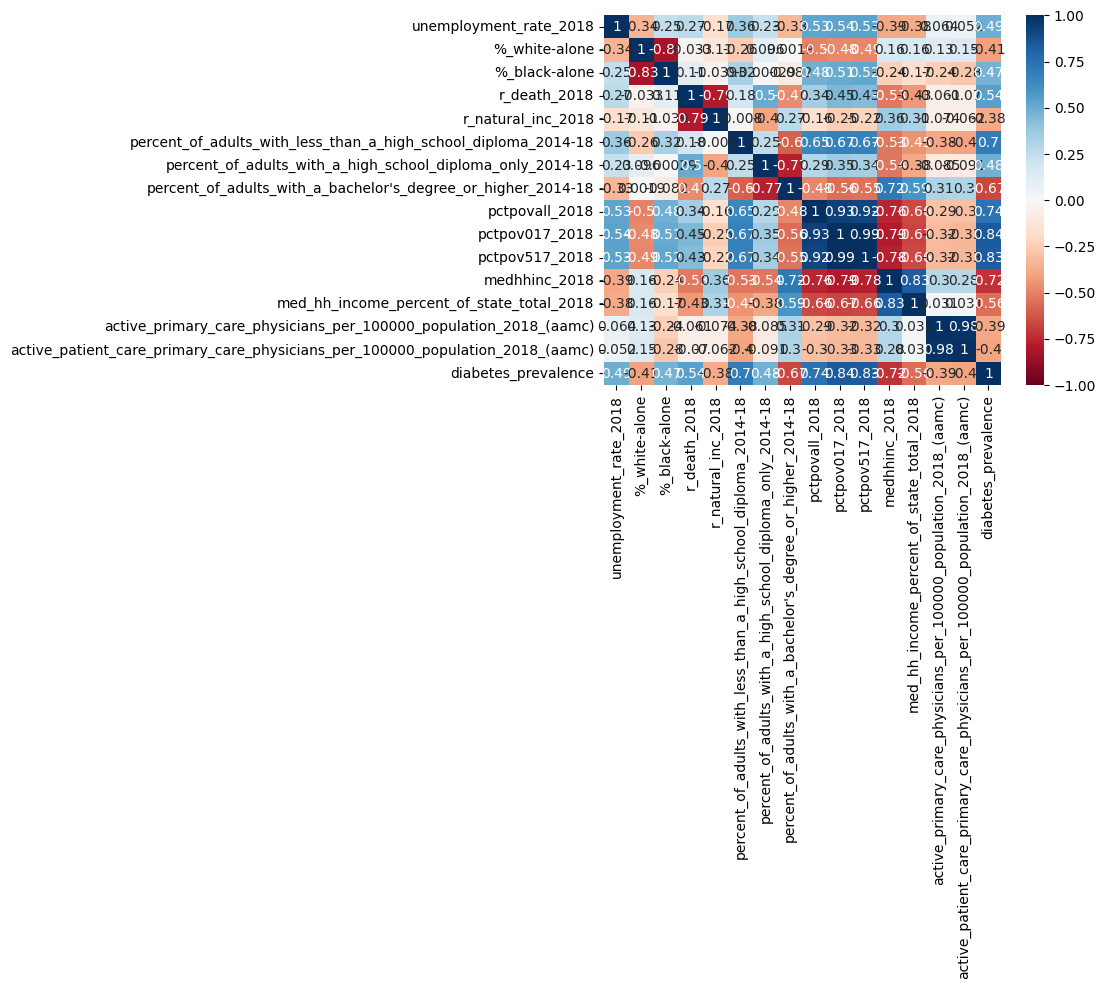

In [59]:
sns.heatmap(df_processed.corr(), vmin=-1, vmax=1, cmap='RdBu', annot=True)
plt.show()

There's correlation between some variables, therefore, a regularized model is more effective since it can handle multicorrelation better than plain linear regression. 